In [63]:
import pandas as pd

dec_train_test = pd.read_csv('../DATASET/train_test/dec_train_test.csv')
nov_train_test = pd.read_csv('../DATASET/train_test/nov_train_test.csv')
oct_train_test = pd.read_csv('../DATASET/train_test/oct_train_test.csv')

In [64]:
dec_train_test

,lat,lon,year,month,precip_est,precip_obs,bias_dec,is_train
0,45.0,-20.0,1982,1,114.242190,158.107760,-43.865570,True
1,45.0,-19.0,1982,1,109.765625,138.565060,-28.799435,True
2,45.0,-18.0,1982,1,106.218750,122.867584,-16.648834,True
3,45.0,-17.0,1982,1,105.335940,109.741210,-4.405270,True
4,45.0,-16.0,1982,1,103.375000,106.399536,-3.024536,True
...,...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,6,0.351885,3.776550,-3.424665,False
230252,20.0,17.0,2017,6,0.426104,3.719330,-3.293226,False
230253,20.0,18.0,2017,6,1.090166,3.147125,-2.056959,False
230254,20.0,19.0,2017,6,1.437823,0.000000,1.437823,False


In [65]:
dec_train_test = dec_train_test.drop(columns=['year'])
nov_train_test = nov_train_test.drop(columns=['year'])
oct_train_test = oct_train_test.drop(columns=['year'])

In [66]:
dec_average= dec_train_test.groupby(['month', 'is_train', 'lat', 'lon']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()
oct_average= oct_train_test.groupby(['month', 'is_train', 'lat', 'lon']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()
nov_average= nov_train_test.groupby(['month', 'is_train', 'lat', 'lon']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()

In [67]:
dec_average

,month,is_train,lat,lon,precip_est,precip_obs
0,1,False,20.0,-20.0,1.605918,0.705719
1,1,False,20.0,-19.0,1.319785,0.345230
2,1,False,20.0,-18.0,0.968711,0.351906
3,1,False,20.0,-17.0,0.852500,0.422478
4,1,False,20.0,-16.0,0.831992,0.207424
...,...,...,...,...,...,...
12787,6,True,45.0,16.0,109.268251,88.549069
12788,6,True,45.0,17.0,98.144296,85.424696
12789,6,True,45.0,18.0,90.160480,76.732772
12790,6,True,45.0,19.0,82.363117,67.252568


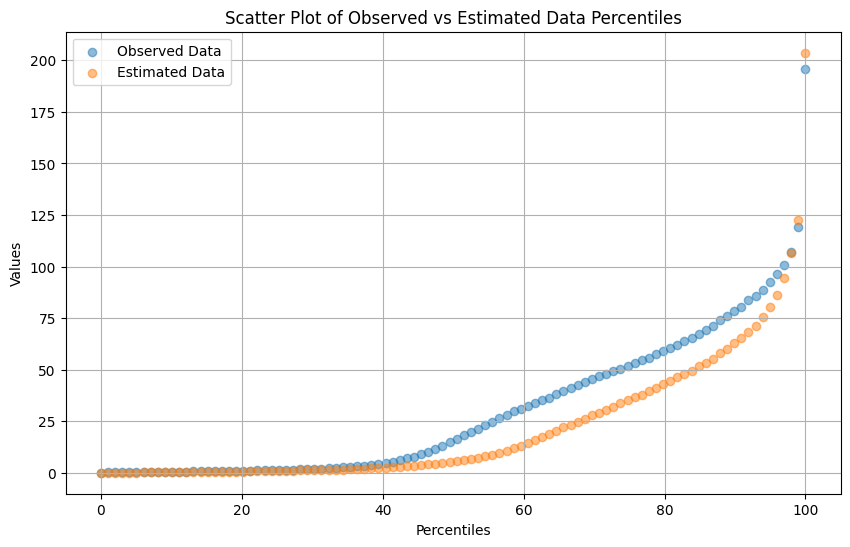

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Let's assume we have two numpy arrays of data: observed and estimated
# For the sake of example, I'll generate some random data to represent this
# np.random.seed(42)
observed_data = dec_average[dec_average['is_train'] == False]['precip_est']
estimated_data = dec_average[dec_average['is_train'] == False]['precip_obs']

# Calculate the percentiles
percentiles = np.linspace(0, 100, 100)  # 100 percentiles from 0 to 100
observed_percentiles = np.percentile(observed_data, percentiles)
estimated_percentiles = np.percentile(estimated_data, percentiles)

plt.figure(figsize=(10, 6))
plt.scatter(percentiles, observed_percentiles, alpha=0.5, label='Observed Data')
plt.scatter(percentiles, estimated_percentiles, alpha=0.5, label='Estimated Data')

plt.title('Scatter Plot of Observed vs Estimated Data Percentiles')
plt.xlabel('Percentiles')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# import pandas as pd
# import numpy as np

# def apply_quantile_mapping(df):
#     # Initialize a new column for the corrected estimates
#     df['corrected_precip_est'] = df['precip_est']
    
#     # Group by month, latitude, and longitude
#     group_cols = ['month', 'lat', 'lon']
#     for name, group in df.groupby(group_cols):
#         training_data = group[group['is_train']]
        
#         if not training_data.empty:
#             # Calculate quantiles
#             quantiles = np.linspace(0, 1, 100)
#             obs_quantiles = np.quantile(training_data['precip_obs'], quantiles)
#             est_quantiles = np.quantile(training_data['precip_est'], quantiles)

#             # Create a function to map estimated values to observed quantiles
#             def map_quantiles(est_value):
#                 idx = np.searchsorted(est_quantiles, est_value, side="right") - 1
#                 idx = max(0, min(idx, len(obs_quantiles) - 1))  # Ensure index is within bounds
#                 return obs_quantiles[idx]
            
#             # Apply quantile mapping to all estimated precipitation values for this group
#             correction_indices = df.index[(df['month'] == name[0]) & (df['lat'] == name[1]) & (df['lon'] == name[2])]
#             df.loc[correction_indices, 'corrected_precip_est'] = group['precip_est'].apply(map_quantiles)

#     # Calculate the row-wise RMSE (which will be the absolute difference here)
#     df['RMSE'] = np.sqrt((df['corrected_precip_est'] - df['precip_obs'])**2)

# # Example of how to use the function
# # Assuming you have loaded your dataset into a DataFrame named `dataframe`
# apply_quantile_mapping(dec_average)

# # Display the DataFrame to check new columns
# dec_average[['month', 'lat', 'lon', 'is_train', 'precip_est', 'precip_obs', 'corrected_precip_est', 'RMSE']]

In [70]:
import pandas as pd
import numpy as np

def apply_quantile_mapping(df):
    # Initialize a new column for the corrected estimates
    df['corrected_precip_est'] = df['precip_est']
    
    # Group by month, latitude, and longitude
    group_cols = ['month', 'lat', 'lon']
    for name, group in df.groupby(group_cols):
        training_data = group[group['is_train']]
        
        if not training_data.empty:
            # Calculate quantiles
            quantiles = np.linspace(0, 1, 100)
            obs_quantiles = np.quantile(training_data['precip_obs'], quantiles)
            est_quantiles = np.quantile(training_data['precip_est'], quantiles)

            # Create a function to map estimated values to observed quantiles
            def map_quantiles(est_value):
                idx = np.searchsorted(est_quantiles, est_value, side="right") - 1
                idx = max(0, min(idx, len(obs_quantiles) - 1))  # Ensure index is within bounds
                return obs_quantiles[idx]
            
            # Apply quantile mapping to all estimated precipitation values for this group
            correction_indices = group.index
            df.loc[correction_indices, 'corrected_precip_est'] = group['precip_est'].apply(map_quantiles)

    # Calculate the RMSE only for the test set
    test_data = df[df['is_train'] == False]
    df.loc[test_data.index, 'RMSE'] = np.sqrt((test_data['corrected_precip_est'] - test_data['precip_obs'])**2)

# Example of how to use the function
# Assuming you have loaded your dataset into a DataFrame named `dataframe`
apply_quantile_mapping(dec_average)

# Display the DataFrame to check new columns
dec_average[['month', 'lat', 'lon', 'is_train', 'precip_est', 'precip_obs', 'corrected_precip_est', 'RMSE']]

,month,lat,lon,is_train,precip_est,precip_obs,corrected_precip_est,RMSE
0,1,20.0,-20.0,False,1.605918,0.705719,2.957889,2.252170
1,1,20.0,-19.0,False,1.319785,0.345230,3.697940,3.352710
2,1,20.0,-18.0,False,0.968711,0.351906,2.920423,2.568517
3,1,20.0,-17.0,False,0.852500,0.422478,3.280776,2.858298
4,1,20.0,-16.0,False,0.831992,0.207424,4.537310,4.329886
...,...,...,...,...,...,...,...,...
12787,6,45.0,16.0,True,109.268251,88.549069,88.549069,NaN
12788,6,45.0,17.0,True,98.144296,85.424696,85.424696,NaN
12789,6,45.0,18.0,True,90.160480,76.732772,76.732772,NaN
12790,6,45.0,19.0,True,82.363117,67.252568,67.252568,NaN


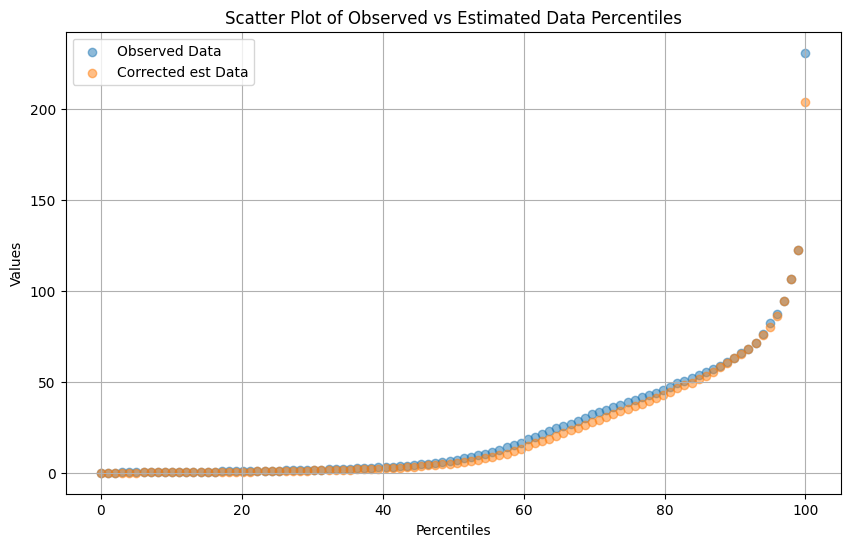

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Let's assume we have two numpy arrays of data: observed and estimated
# For the sake of example, I'll generate some random data to represent this
# np.random.seed(42)
observed_data = dec_average[dec_average['is_train'] == False]['corrected_precip_est']
estimated_data = dec_average[dec_average['is_train'] == False]['precip_obs']

# Calculate the percentiles
percentiles = np.linspace(0, 100, 100)  # 100 percentiles from 0 to 100
observed_percentiles = np.percentile(observed_data, percentiles)
estimated_percentiles = np.percentile(estimated_data, percentiles)

plt.figure(figsize=(10, 6))
plt.scatter(percentiles, observed_percentiles, alpha=0.5, label='Observed Data')
plt.scatter(percentiles, estimated_percentiles, alpha=0.5, label='Corrected est Data')

plt.title('Scatter Plot of Observed vs Estimated Data Percentiles')
plt.xlabel('Percentiles')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## We have an under isitimation generally!!

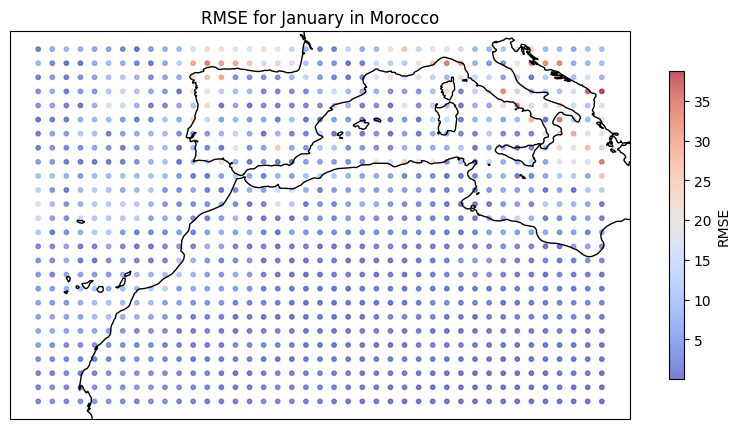

In [72]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import seaborn as sns

# Load your data into a DataFrame.
df = dec_average

# Filter the DataFrame for January and is_train == False.
january_test_df = df[(df['month'] == 1) & (df['is_train'] == False)]

# Create a scatter plot using plt.scatter for the lat/lon with the color intensity based on the RMSE.
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# You might want to adjust the extent to frame Morocco properly
# ax.set_extent([left_longitude, right_longitude, bottom_latitude, top_latitude])

scatter = ax.scatter(january_test_df['lon'], january_test_df['lat'], 
                     c=january_test_df['RMSE'], cmap='coolwarm', 
                     s=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.colorbar(scatter, shrink=0.5, label='RMSE')
plt.title('RMSE for January in Morocco')
plt.show()

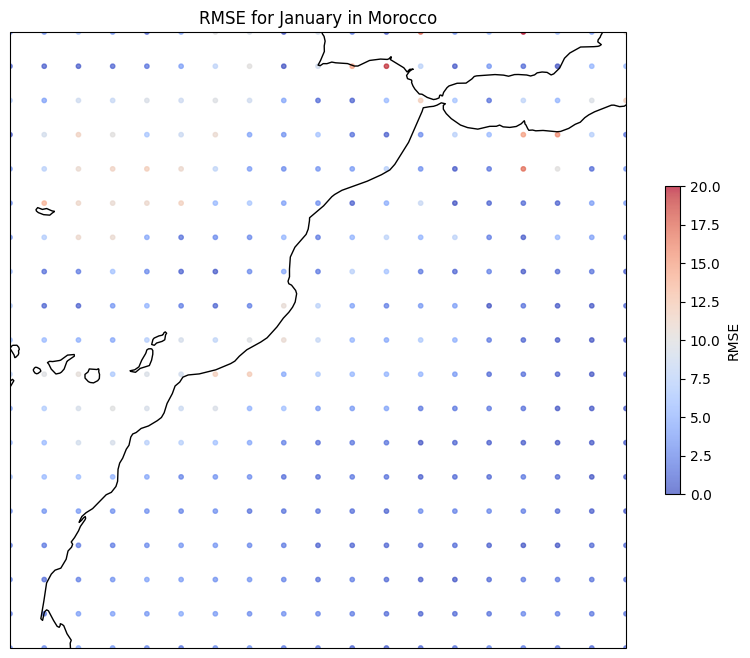

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Load your data into a DataFrame.
df = dec_average  # Make sure 'dec_average' is defined and contains your data.

# Filter the DataFrame for January and is_train == False.
january_test_df = df[(df['month'] == 1) & (df['is_train'] == False)]

# Start by setting up the figure and axes with the desired size and projection.
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map to frame Morocco properly.
# This should come before plotting the scatter plot to avoid any overlay issues.
ax.set_extent([-18, 0, 20, 38])

# Add the coastlines to the map for reference.
ax.coastlines()

scatter = ax.scatter(january_test_df['lon'], january_test_df['lat'], 
                     c=january_test_df['RMSE'], cmap='coolwarm', vmin=0, vmax=20,
                     s=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.colorbar(scatter, shrink=0.5, label='RMSE')
plt.title('RMSE for January in Morocco')
plt.show()

In [74]:
dec_average

,month,is_train,lat,lon,precip_est,precip_obs,corrected_precip_est,RMSE
0,1,False,20.0,-20.0,1.605918,0.705719,2.957889,2.252170
1,1,False,20.0,-19.0,1.319785,0.345230,3.697940,3.352710
2,1,False,20.0,-18.0,0.968711,0.351906,2.920423,2.568517
3,1,False,20.0,-17.0,0.852500,0.422478,3.280776,2.858298
4,1,False,20.0,-16.0,0.831992,0.207424,4.537310,4.329886
...,...,...,...,...,...,...,...,...
12787,6,True,45.0,16.0,109.268251,88.549069,88.549069,NaN
12788,6,True,45.0,17.0,98.144296,85.424696,85.424696,NaN
12789,6,True,45.0,18.0,90.160480,76.732772,76.732772,NaN
12790,6,True,45.0,19.0,82.363117,67.252568,67.252568,NaN
